# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

## Section 1: Preparing the data

In [2]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

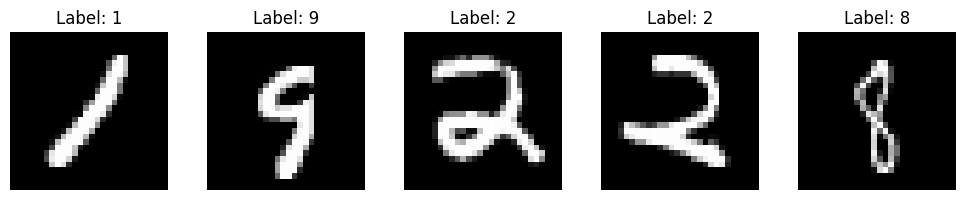

In [3]:
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y

# Number of random images to display
num_images = 5

# Randomly select 5 indices from the dataset
random_indices = np.random.choice(train_X.shape[0], num_images, replace=False)

# Create a plot with 1 row and 5 columns to display images
plt.figure(figsize=(10, 2))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_X[idx], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {train_y[idx]}")
    plt.axis('off')  # Turn off axis for better visualization

plt.tight_layout()
plt.show()


**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [4]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    #TODO
    idxs = np.where((y==d1)|(y==d2))[0]
    
    X_extracted = X[idxs,:,:]
    y_extracted = y[idxs]

    return (X_extracted, y_extracted)

**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [5]:

def vectorize_images(X):
    # Step 1: Vectorize the dataset (flatten each image)
    vectorized_X = X.reshape(X.shape[0], -1)  # N x 784
    
    # Step 2: Transpose the vectorized result
    transposed_vectorized_X = vectorized_X.T  # 784 x N
    
    # Step 3: Normalize pixel values between 0 and 1 by dividing by the max value in each column
    max_values = transposed_vectorized_X.max(axis=0)  # Max value of each column
    X_normalized = transposed_vectorized_X / max_values  # Normalize by the max value of each column
    
    # Return the transformed dataset
    return X_normalized

**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [6]:
b_train_X_1_5,train_y_1_5 = extract_digits(train_X,train_y,1,5)
b_test_X_1_5, test_y_1_5 = extract_digits(test_X,test_y,1,5)

train_X_1_5 = vectorize_images(b_train_X_1_5)
test_X_1_5 = vectorize_images(b_test_X_1_5)


train_y_1_5[train_y_1_5==1] = 0
train_y_1_5[train_y_1_5==5] = 1
train_class_1_5 = train_y_1_5


test_y_1_5[test_y_1_5==1] = 0
test_y_1_5[test_y_1_5==5] = 1
test_class_1_5 = test_y_1_5


print("b_train_X_1_5 shape: ",b_train_X_1_5.shape)
print("train_X_1_5 shape: ", train_X_1_5.shape)
print("b_test_X_1_5 shape: ", b_test_X_1_5.shape)
print("test_X_1_5 shape: ",test_X_1_5.shape)



b_train_X_1_5 shape:  (12163, 28, 28)
train_X_1_5 shape:  (784, 12163)
b_test_X_1_5 shape:  (2027, 28, 28)
test_X_1_5 shape:  (784, 2027)


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [7]:
# Sigmoid activation function
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)  # Clipping to prevent overflow
    sigma = 1 / (1 + np.exp(-Z))  # Sigmoid formula
    return sigma

# Derivative of the sigmoid function
def deriv_sigmoid(Y):
    sigma_prime = Y * (1 - Y)  # Derivative of sigmoid formula
    return sigma_prime

# ReLU activation function
def ReLu(Z):
    relu = np.maximum(0, Z)  # ReLU formula
    return relu

# Derivative of ReLU function
def deriv_ReLu(Y):
    relu_prime = np.where(Y > 0, 1, 0)  # Derivative of ReLU formula
    return relu_prime


**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [8]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3


**Answers** (to write answers edit this cell)

(i) What do the Y, Z, W variables refer to and their purpose?

Y (Activations): Stores the output of each layer after applying the activation function. It represents the model's predictions for each neuron at every layer, which are passed to the next layer in forward propagation.

Z (Pre-activations): Stores the weighted sums of inputs plus bias before applying the activation function. These values are used for calculating gradients during backpropagation and for computing the derivatives of the activation function.

W (Weights): Stores the weight matrices for each layer in the network. The weights determine the strength of the connections between neurons and are updated during training to minimize the model's error.

(ii) Line1: Explanation


This line initializes a matrix of zeros to store the activations (output after applying activation functions) for the current layer i. The matrix dimensions are layers[i] (number of neurons in the layer) by batch_size (the number of samples being processed at once). Each layer's activations are stored in self.Y for use in forward propagation and backpropagation.

(iii) Line2: Explanation


This line initializes a matrix of zeros to store the pre-activations (values before applying the activation function) for the current layer i. The matrix has the same dimensions as the activation matrix, layers[i] by batch_size. The pre-activations are used to compute the gradient during backpropagation and are stored in self.Z.

(iv) Line3: Explanation


This line initializes the weight matrix for the current layer i with random values between -1 and 1. The weight matrix has dimensions layers[i] (number of neurons in the current layer) by layers[i-1] + 1 (number of neurons in the previous layer plus an additional bias term). The weights are crucial for learning and will be updated during training to minimize the error of the network's predictions.

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [9]:
def feedforward(model, X):

    #TODO
    X_1 = np.append(X, np.ones((1,X.shape[1])),axis=0)

    L = len(model.hidden_layers) + 1

    Y = X_1
    for i in range(0,L):
        Z = model.W[i].dot(Y)

        if i < L-1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)

        model.Z[i] = Z
        model.Y[i] = Y

        # print(f"Layer {i}: Y shape = {Z}")
      
        if i < L - 1:
            Y = np.append(Y, np.ones((1,Y.shape[1])),axis=0)

        
    return(model)

**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

<font color='green'>The Bias term is a parameter that allows models to represent patterns that do not pass through the origin. When used within an activation function, the purpose of the bias term is to shift the position of the curve left or right to delay or accelerate the activation of a node. In the weight matrix there is a coloumn with bias terms. when input data matrix multiply with the weight matrix, in order to do the matrix multiplication row of one's needed in the input data matrix to multiply with the bias term coloumn.</font>

**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [10]:
def backpropagation(model, X, Y, eta = 0.01):

    #TODO

    L = len(model.hidden_layers) + 1

    # dc_dy = (model.Y[L-1] - Y) / len(Y)
    dc_dy = (model.Y[L-1] - Y) 
    # print('initial ', len(dc_dy) )

    for i in range(L-1 ,-1,-1):
        if i==L-1:
            dc_dz = deriv_sigmoid(model.Y[i]) * dc_dy
        else:
            dc_dz = deriv_ReLu(model.Y[i])  * dc_dy

        # print('dc_dz rows ',len(dc_dz))
        # print('dc_dz coloumns ',len(dc_dz[0]))

        if i > 0:
            Y_L_prev = np.append(model.Y[i-1],np.ones((1,model.Y[i-1].shape[1])),axis=0)    
            dc_dw  = dc_dz.dot(Y_L_prev.T)
        else:
            X_1 = np.append(X,np.ones((1,X.shape[1])),axis=0)
            dc_dw  = dc_dz.dot(X_1.T)

        # print('dc_dw rows ', len(dc_dw))
        # print('dc dw coloumns ',len(dc_dw[0]))

        dc_dy = model.W[i].T.dot(dc_dz) 
        dc_dy = dc_dy[:-1]
        # print("dc_dy ",dc_dy)
        
        # print('dc dy rows ',len(dc_dy))
        # print('dc dy coloumns ',len(dc_dy[0]))

        model.W[i] -= eta* dc_dw

    

    return(model)

**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def train_NNet(X, Y, epochs=20, batch_size=1000, eta=0.01, hidden_layers=[500, 250, 50]):

    # Initialize model
    model = NNet(input_size=X.shape[0], output_size=1, batch_size=batch_size, hidden_layers=hidden_layers)

    costs = []
    weights_change = []
    avg_costs_per_epoch = []
    avg_weights_change_per_epoch = []

    for epoch in tqdm(range(epochs)):
        # Permute data
        perm = np.random.permutation(X.shape[1])
        permuted_X = X[:, perm]
        permuted_Y = Y[perm]

        # Split data into mini-batches
        data_loader_X = np.array_split(permuted_X, permuted_X.shape[1] // batch_size, axis=1)
        data_loader_Y = np.array_split(permuted_Y, permuted_Y.shape[0] // batch_size, axis=0)

        weight_changes_epoch = []
        costs_epoch = []

        for batch_X, batch_Y in zip(data_loader_X, data_loader_Y):
            # Feedforward
            model = feedforward(model, batch_X)
            y_pred = model.Y[-1]

            # Backpropagation
            w_prev = [w.copy() for w in model.W]
            model = backpropagation(model, batch_X, batch_Y, eta)
            w_now = model.W

            # Compute cost for the current batch
            cost = np.mean(np.square(y_pred - batch_Y)) / 2
            costs.append(cost)
            costs_epoch.append(cost)

            # Compute weight change for the current batch
            weight_change = sum(np.linalg.norm(w_now[i] - w_prev[i]) for i in range(len(w_now)))
            weight_changes_epoch.append(weight_change)

        # Average weight change and cost across batches for this epoch
        avg_weight_change = np.mean(weight_changes_epoch)
        avg_cost = np.mean(costs_epoch)
        weights_change.append(avg_weight_change)
        avg_costs_per_epoch.append(avg_cost)
        avg_weights_change_per_epoch.append(avg_weight_change)

        # Display details every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs}')
            print(f'Cost: {avg_cost}')
            print(f'Average Weight Change: {avg_weight_change}')

    # Plotting
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))

    # Plot for cost per step
    ax[0].plot(range(1, len(costs) + 1), costs)
    ax[0].set_title("Cost C vs Steps")
    ax[0].set_xlabel('Steps')
    ax[0].set_ylabel('Cost C')

    # Plot for weight change per step
    ax[1].plot(range(1, len(weights_change) + 1), weights_change)
    ax[1].set_title('Weight Change vs Steps')
    ax[1].set_xlabel('Steps')
    ax[1].set_ylabel('Weight Change L2 Norm')

    # Plot for average cost and weight change per epoch
    epochs_range = range(1, epochs + 1)
    ax[2].plot(epochs_range, avg_costs_per_epoch, label='Average Cost per Epoch')
    ax[2].plot(epochs_range, avg_weights_change_per_epoch, label='Average Weight Change per Epoch')
    ax[2].set_title('Average Cost and Weight Change per Epoch')
    ax[2].set_xlabel('Epochs')
    ax[2].set_ylabel('Average Value')
    ax[2].legend()

    plt.tight_layout()
    plt.show()

    return model


  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 10/100 [00:34<05:03,  3.37s/it]

Epoch 10/100
Cost: 0.006843744328795834
Average Weight Change: 0.014034180034867977


 20%|██        | 20/100 [01:07<04:23,  3.29s/it]

Epoch 20/100
Cost: 0.004126982900365802
Average Weight Change: 0.005348556907726647


 30%|███       | 30/100 [01:35<03:14,  2.78s/it]

Epoch 30/100
Cost: 0.0030999763224001564
Average Weight Change: 0.0020458614221200377


 40%|████      | 40/100 [02:03<02:44,  2.75s/it]

Epoch 40/100
Cost: 0.0036217131388523952
Average Weight Change: 0.003950858657907273


 50%|█████     | 50/100 [02:30<02:14,  2.69s/it]

Epoch 50/100
Cost: 0.0024671035596846636
Average Weight Change: 1.329638728918e-06


 60%|██████    | 60/100 [02:57<01:44,  2.62s/it]

Epoch 60/100
Cost: 0.002497026177087363
Average Weight Change: 0.0015382384410661542


 70%|███████   | 70/100 [03:24<01:19,  2.65s/it]

Epoch 70/100
Cost: 0.0033983740154963993
Average Weight Change: 0.004830326143114508


 80%|████████  | 80/100 [03:50<00:53,  2.69s/it]

Epoch 80/100
Cost: 0.0022542491513377217
Average Weight Change: 0.0013500919898695167


 90%|█████████ | 90/100 [04:19<00:29,  2.98s/it]

Epoch 90/100
Cost: 0.0022203842671842788
Average Weight Change: 1.4741564542946942e-06


100%|██████████| 100/100 [04:49<00:00,  2.90s/it]

Epoch 100/100
Cost: 0.002410397150560512
Average Weight Change: 0.002733397953232365


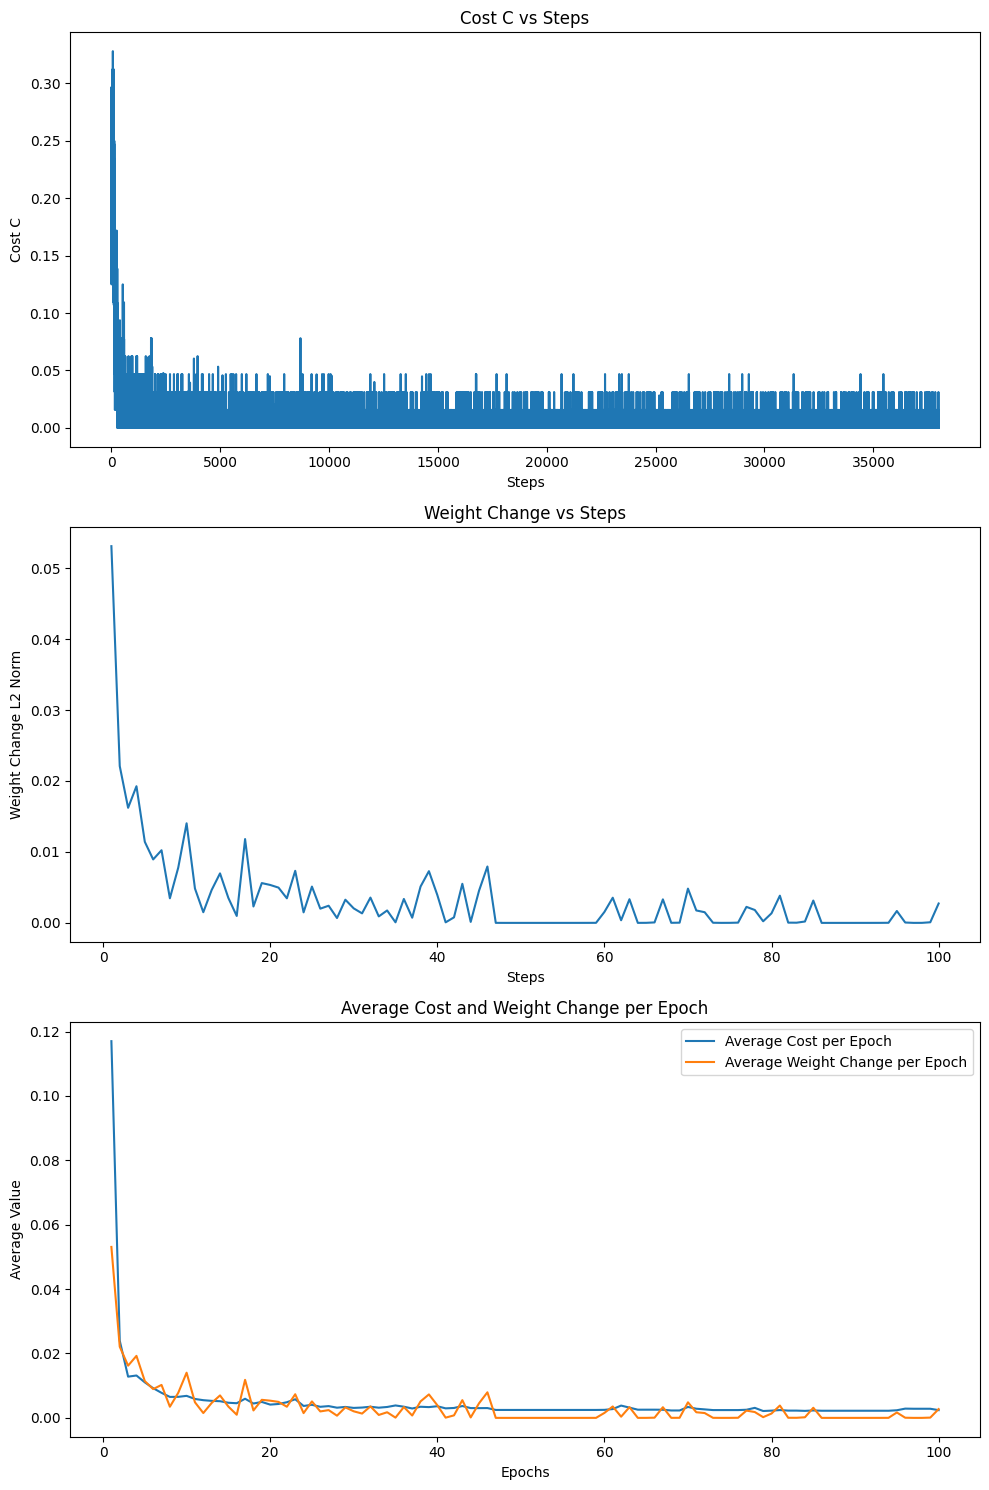

In [12]:
model = train_NNet(train_X_1_5,train_class_1_5,eta = 0.002,hidden_layers=[256,128,32],epochs = 100,batch_size = 32)

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [13]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = np.where(Y == 0, d1, d2)

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

In [16]:
deafult_accuracy, y_pred = test_model(test_X_1_5,test_class_1_5,model,1,5)
print("The Default Model Accuracy - {:.2f}%".format(deafult_accuracy*100))

The Default Model Accuracy - 98.54%
